In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn import tree

sns.set(style="darkgrid")
pd.set_option("display.precision", 10)

# Mengambil directory dan input file awal

In [2]:
cwd = os.getcwd()
input_dir = os.path.join(cwd, 'input')
output_dir = os.path.join(cwd, 'output')
features = os.path.join(output_dir, 'features_without_high_correlated_value.csv')
features_importance = os.path.join(output_dir, 'features_importance.csv')

---

# Mengambil data Features Importance

In [3]:
features_importance = pd.read_csv(features_importance)

In [4]:
features_importance

,features,score
0,amplitude__kurtosis,0.0662309506
1,amplitude__ratio_beyond_r_sigma__r_3,0.0653174927
2,amplitude__energy_ratio_by_chunks__num_segment...,0.0520284416
3,amplitude__energy_ratio_by_chunks__num_segment...,0.0472692829
4,amplitude__ratio_beyond_r_sigma__r_0.5,0.0362817475
...,...,...
102,"amplitude__fft_coefficient__attr_""abs""__coeff_24",0.0011656323
103,"amplitude__fft_coefficient__attr_""real""__coeff_6",0.0011443506
104,"amplitude__fft_coefficient__attr_""abs""__coeff_11",0.0011220683
105,"amplitude__fft_coefficient__attr_""abs""__coeff_77",0.0010346143


---

# Mengambil data label

In [5]:
y = pd.read_csv(os.path.join(input_dir, 'label.csv'), index_col=0)
y = y['label']
y

1       1
2       1
3       1
4       1
5       1
       ..
2110    2
2111    2
2112    2
2113    2
2114    2
Name: label, Length: 2114, dtype: int64

---

# Membaca hasil ekstraksi features

In [6]:
df = pd.read_csv(features)

Mengambil *features* sesuai dengan *features importance*

In [7]:
df

,amplitude__energy_ratio_by_chunks__num_segments_10__segment_focus_3,amplitude__kurtosis,amplitude__ratio_beyond_r_sigma__r_1,amplitude__ratio_beyond_r_sigma__r_3,amplitude__binned_entropy__max_bins_10,amplitude__ratio_beyond_r_sigma__r_0.5,amplitude__energy_ratio_by_chunks__num_segments_10__segment_focus_9,amplitude__energy_ratio_by_chunks__num_segments_10__segment_focus_8,amplitude__large_standard_deviation__r_0.1,amplitude__ratio_beyond_r_sigma__r_5,...,"amplitude__fft_coefficient__attr_""imag""__coeff_56","amplitude__fft_coefficient__attr_""abs""__coeff_81","amplitude__fft_coefficient__attr_""imag""__coeff_64","amplitude__fft_coefficient__attr_""real""__coeff_84","amplitude__fft_coefficient__attr_""real""__coeff_17","amplitude__fft_coefficient__attr_""abs""__coeff_82","amplitude__fft_coefficient__attr_""angle""__coeff_88","amplitude__fft_coefficient__attr_""angle""__coeff_98","amplitude__fft_coefficient__attr_""abs""__coeff_74","amplitude__fft_coefficient__attr_""imag""__coeff_16"
0,0.4695131897,5.9596787552,0.2007992008,0.022977023,1.2171022359,0.4165834166,0.0248113930,0.0214829799,0.0,0.002997003,...,0.7980203501,4.0106274568,5.4567721145,-7.8720642491,-0.2559359816,4.7814387042,-174.3800491581,-3.7875926325,7.8934893746,0.2975099935
1,0.3265442118,10.8458527262,0.1660000000,0.022000000,1.0957101418,0.3710000000,0.0093517693,0.0106523746,0.0,0.006000000,...,-0.2880842844,1.5074280968,1.1352598473,-2.4711056985,0.3030635229,2.6475660372,29.2914526326,15.3244667237,0.8108321982,0.7507887297
2,0.3454570172,3.7233895254,0.2210000000,0.020000000,1.3103420803,0.4700000000,0.0321583306,0.0189159916,0.0,0.001000000,...,2.6919452644,2.4996681561,0.6469656190,-4.8939413556,1.5457284620,4.4729787635,78.1269248730,142.8775092189,16.0034139726,0.2440288697
3,0.3567146921,5.2847552092,0.2150000000,0.019000000,1.1427854549,0.4180000000,0.0115551234,0.0163451928,0.0,0.003000000,...,-2.9474541443,1.1142644630,-0.7746749017,1.1906342349,-1.0385847678,2.0178554552,-79.6124732914,51.0239734903,2.3971579095,-0.1625637309
4,0.3491768673,2.9322988149,0.2090000000,0.022000000,1.6147284112,0.4160000000,0.0138947955,0.0178565889,1.0,0.000000000,...,3.4429823148,9.8652356490,0.6468613503,8.9847988743,-0.0316729594,8.6061316213,-73.5213408378,-61.0726809952,36.5599949438,-0.2106943304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,0.1366882946,0.0018996861,0.3126873127,0.000999001,1.8846058442,0.5914085914,0.0400593453,0.0291000867,1.0,0.000000000,...,0.0092737299,0.0378239039,0.2382465447,0.0654739110,-0.8551713477,0.3759687443,-45.4787935760,-37.0665391539,0.3430402797,-0.6239532248
2110,0.1889252479,1.0143742213,0.2890000000,0.008000000,1.7253983048,0.5120000000,0.0307510079,0.1565118361,1.0,0.000000000,...,24.4989336941,13.6348275746,-50.9306200884,-6.4801050158,1.4613141926,2.2750942739,123.7503868897,155.4117744509,5.1929747193,0.1773905686
2111,0.1232554300,1.9562094686,0.2510000000,0.014000000,1.5483737507,0.5320000000,0.0322291668,0.0494705113,1.0,0.000000000,...,-0.9606018024,1.0519402343,0.9739612097,-2.1399532128,0.3797597567,0.9420018547,61.4538973223,-30.8466692343,3.6856539678,-0.5414002693
2112,0.1139444613,1.0444359043,0.2760000000,0.008000000,1.7228621425,0.5370000000,0.0714661646,0.1090432233,1.0,0.000000000,...,-4.1812985979,2.6885114476,-1.5090634561,18.1759745574,-1.6068572741,8.3551929201,-165.5440018165,5.8973752485,20.5717954540,0.9636790627


Membuat fungsi untuk mendapatkan hasil prediksi

In [8]:
def get_confusion_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

In [9]:
def get_predicted(dataframe, label, n_estimators=100, max_depth=5, confusion_matriks=False):
    X_train, X_test, y_train, y_test = train_test_split(dataframe, label, test_size = 0.3, random_state = 0)
    
    rfc = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        random_state=17
    )

    rfc.fit(X_train, y_train)

    y_pred = rfc.predict(X_test)
    
    cm_matrix = np.NaN
    
    if confusion_matriks:
        cm_matrix = get_confusion_matrix(y_test, y_pred)
        
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return accuracy_score(y_test, y_pred), cm_matrix, rmse

In [10]:
def training(dataframe, label):
    number_of_features = len(dataframe.columns)
    features = dataframe.columns.to_list()
    predicted_score, _, rmse = get_predicted(dataframe, label)
    return [number_of_features, features, predicted_score, rmse]

Variabel `features` digunakan untuk menyimpan `features` yang digunakan. Sementara `result` digunakan untuk menyimpan hasil prediksinya

In [11]:
features = []
result = []

for feature in features_importance['features']:
    features.append(feature)
    result.append(training(df[features], y))

---

# Menyimpan hasil Features Performance ke dalam *dataframe*

In [12]:
result_df = pd.DataFrame(result, columns=['number_of_features', 'features', 'accuracy_score', 'rmse'])

In [13]:
result_df.describe()

,number_of_features,accuracy_score,rmse
count,107.0000000000,107.0000000000,107.0000000000
mean,54.0000000000,0.9831775701,0.1225686204
std,31.0322412984,0.0181184354,0.0436517826
min,1.0000000000,0.8425196850,0.0887356509
25%,27.5000000000,0.9842519685,0.1049934381
50%,54.0000000000,0.9874015748,0.1122427067
75%,80.5000000000,0.9889763780,0.1254911610
max,107.0000000000,0.9921259843,0.3968378951


## Menyimpan ke dalam CSV

In [14]:
result_df.to_csv(os.path.join(output_dir, 'features_performance.csv'), index=False)

---

# Mendapatkan Nilai Akurasi Maksimum dengan membandingkan jumlah *features* yang digunakan

In [15]:
number_of_features_used_with_maximum_score = result_df[result_df['accuracy_score'] == result_df['accuracy_score'].max()]

number_of_features_used_with_maximum_score

,number_of_features,features,accuracy_score,rmse
42,43,"[amplitude__kurtosis, amplitude__ratio_beyond_...",0.9921259843,0.0887356509
44,45,"[amplitude__kurtosis, amplitude__ratio_beyond_...",0.9921259843,0.0887356509
55,56,"[amplitude__kurtosis, amplitude__ratio_beyond_...",0.9921259843,0.0887356509
57,58,"[amplitude__kurtosis, amplitude__ratio_beyond_...",0.9921259843,0.0887356509
59,60,"[amplitude__kurtosis, amplitude__ratio_beyond_...",0.9921259843,0.0887356509
61,62,"[amplitude__kurtosis, amplitude__ratio_beyond_...",0.9921259843,0.0887356509
73,74,"[amplitude__kurtosis, amplitude__ratio_beyond_...",0.9921259843,0.0887356509
76,77,"[amplitude__kurtosis, amplitude__ratio_beyond_...",0.9921259843,0.0887356509
91,92,"[amplitude__kurtosis, amplitude__ratio_beyond_...",0.9921259843,0.0887356509
95,96,"[amplitude__kurtosis, amplitude__ratio_beyond_...",0.9921259843,0.0887356509


Menyimpan hasi Nilai Akurasi Maksimum dengan membandingkan jumlah *features* yang digunakan ke dalam CSV

In [16]:
number_of_features_used_with_maximum_score.to_csv(os.path.join(output_dir, 'number_of_features_used_with_maximum_score.csv'), index=False)

---

# Mendapatkan Nilai Akurasi Minimum dengan membandingkan jumlah *features* yang digunakan

In [17]:
number_of_features_used_with_minimum_score = result_df[result_df['accuracy_score'] == result_df['accuracy_score'].min()]

number_of_features_used_with_minimum_score

,number_of_features,features,accuracy_score,rmse
0,1,[amplitude__kurtosis],0.842519685,0.3968378951


Menyimpan hasi Nilai Akurasi Minimum dengan membandingkan jumlah *features* yang digunakan ke dalam CSV

In [18]:
number_of_features_used_with_minimum_score.to_csv(os.path.join(output_dir, 'number_of_features_used_with_minimum_score.csv'), index=False)

---

# Plotting Features Performance dengan jumlah Estimator default (100)

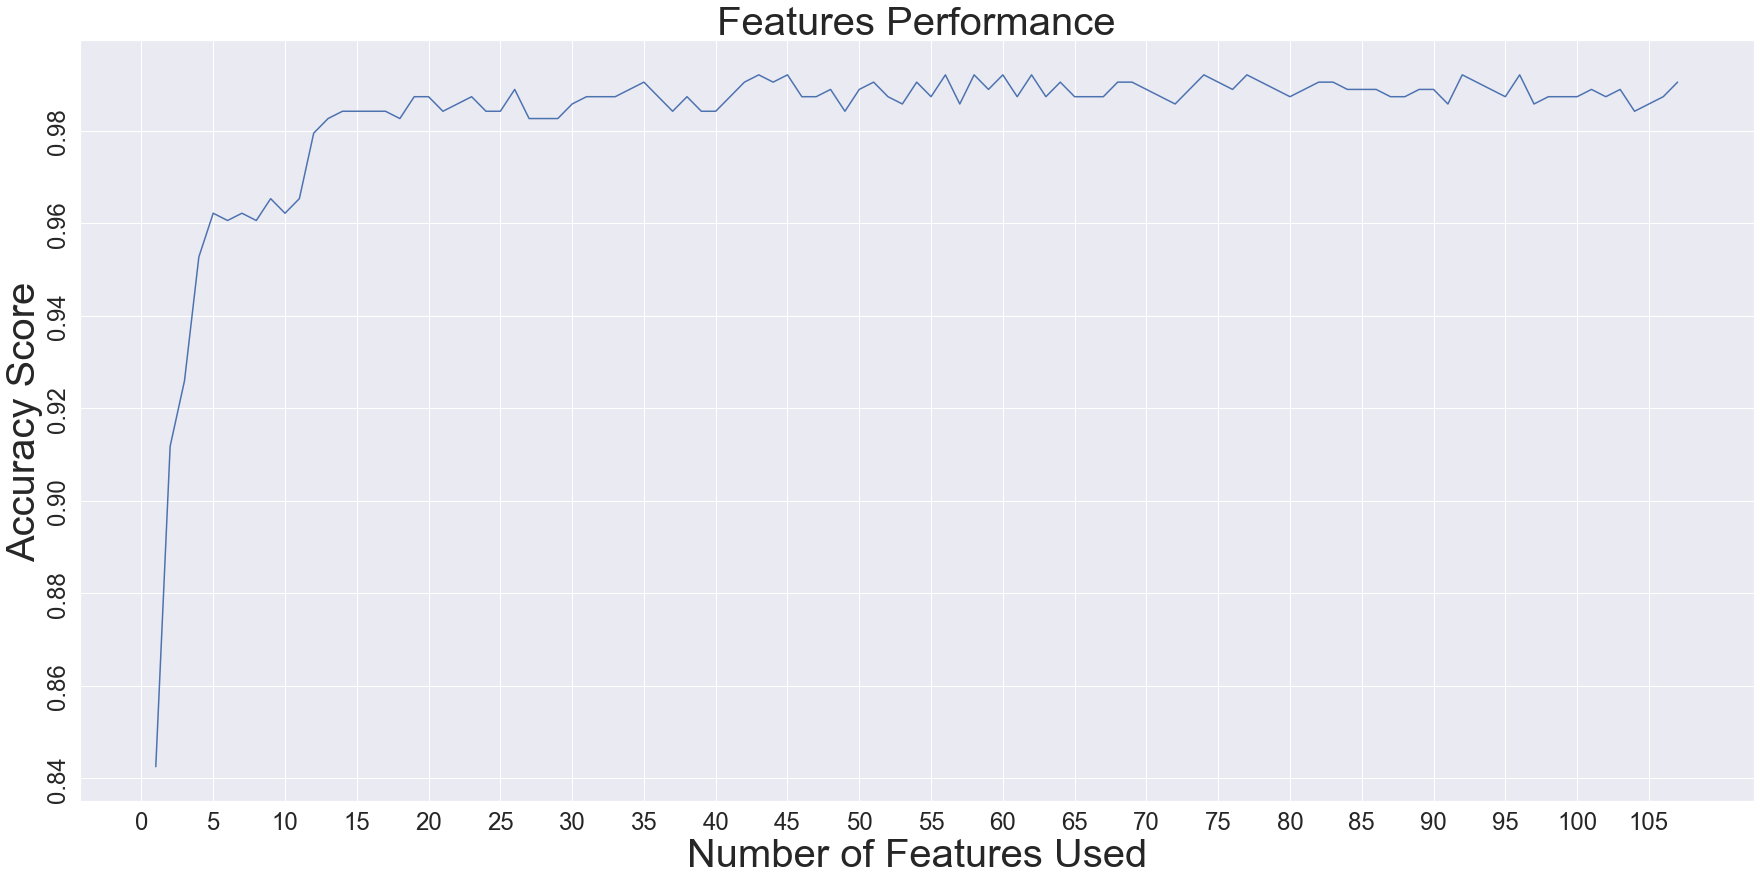

In [25]:
f, ax = plt.subplots(figsize=(30, 14))
filename = os.path.join(output_dir, 'features_performance.tiff')
filename_jpg = os.path.join(output_dir, 'features_performance.jpg')
palette = sns.color_palette("mako_r", 6)

ax = sns.lineplot(
    x='number_of_features', 
    y='accuracy_score', 
    data=result_df,
    palette=palette
)

plt.setp(ax.get_yticklabels(), va="center")

ax.set_xticks(range(0,108,5))
ax.set_title('Features Performance', fontsize=40)
ax.set_xlabel('Number of Features Used', fontsize=40)
ax.set_ylabel('Accuracy Score', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='y', which='major', labelrotation = 90)

plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.savefig(filename_jpg, dpi=300, bbox_inches='tight')
plt.show()

---

# Kalkulasi Perhitungan Features Performance per Jumlah Estimator Tertentu

Membuat fungsi untuk mendapatkan nilai prediksi berdasarkan jumlah estimator yang digunakan

In [26]:
def training_with_estimator(dataframe, label, estimator, confusion_matriks=False):
    number_of_features = len(dataframe.columns)
    predicted_score, confusion_matriks, rmse = get_predicted(dataframe, label, estimator, confusion_matriks=confusion_matriks)
    return [number_of_features, '{} Trees'.format(estimator), predicted_score, rmse, confusion_matriks]

Estimator yang digunakan kelipatan 10 dengan maksimum 100 estimator

In [27]:
estimators = [x for x in range(10,101,10)]
estimators

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [28]:
result_with_estimators = []

for estimator in estimators:
    features = []
    print(estimator, len(features))
    for feature in features_importance['features']:
        features.append(feature)
        result_with_estimators.append(training_with_estimator(df[features], y, estimator, confusion_matriks=True))

10 0
20 0
30 0
40 0
50 0
60 0
70 0
80 0
90 0
100 0


---

# Mendapatkan hasil prediksi untuk setiap estimator

In [29]:
result_with_estimators_df = pd.DataFrame(result_with_estimators, columns=['number_of_features', 'estimators', 'accuracy_score', 'rmse','confusion_matriks'])

In [30]:
result_with_estimators_df

,number_of_features,estimators,accuracy_score,rmse,confusion_matriks
0,1,10 Trees,0.8362204724,0.4046968341,"[[245, 16, 0], [35, 237, 12], [0, 41, 49]]"
1,2,10 Trees,0.9102362205,0.2996060405,"[[255, 6, 0], [36, 237, 11], [0, 4, 86]]"
2,3,10 Trees,0.9291338583,0.2662069528,"[[252, 9, 0], [21, 254, 9], [0, 6, 84]]"
3,4,10 Trees,0.9527559055,0.2173570668,"[[255, 6, 0], [18, 261, 5], [0, 1, 89]]"
4,5,10 Trees,0.9527559055,0.2173570668,"[[255, 6, 0], [16, 261, 7], [0, 1, 89]]"
...,...,...,...,...,...
1065,103,100 Trees,0.9889763780,0.1049934381,"[[259, 2, 0], [5, 279, 0], [0, 0, 90]]"
1066,104,100 Trees,0.9842519685,0.1254911610,"[[258, 3, 0], [7, 277, 0], [0, 0, 90]]"
1067,105,100 Trees,0.9858267717,0.1374686793,"[[260, 1, 0], [7, 277, 0], [1, 0, 89]]"
1068,106,100 Trees,0.9874015748,0.1122427067,"[[259, 2, 0], [6, 278, 0], [0, 0, 90]]"


Menyimpan hasil prediksti untuk setiap estimator. 

In [43]:
result_with_estimators_df.to_csv(os.path.join(output_dir, 'features_performance_with_estimators.csv'), index=False)

# Confusion Matrix per Estimator

Menyimpan hasil perhitungan confusion matriks untuk setiap estimator dengan nilai akurasi maksimum

In [65]:
for estimator in estimators:
    estimator = '{} Trees'.format(estimator)
    
    cm = result_with_estimators_df[(result_with_estimators_df['estimators'] == estimator)]
    
    maximum = result_with_estimators_df[(result_with_estimators_df['estimators'] == estimator)]['accuracy_score'].max()
    rmse = result_with_estimators_df[(result_with_estimators_df['estimators'] == estimator) & (result_with_estimators_df['accuracy_score'] == maximum)]['rmse'].max()
    
    maximum = round(maximum*100, 2)
    
    cm = cm[cm['accuracy_score'] == cm['accuracy_score'].max()]

    labels = ['VT', 'Non VT', 'Overscale']
    cm = cm['confusion_matriks'].to_list()
    cm = pd.DataFrame(data=cm[0], columns=labels, index=labels)

    cm.to_csv(os.path.join(output_dir, 'confusion_matriks_{}_trees.csv'.format(estimator)))
    
    filename = os.path.join(output_dir, 'confusion_trees', 'confusion_matriks_{}.tiff'.format(estimator))
    filename_png = os.path.join(output_dir, 'confusion_trees', 'confusion_matriks_{}.png'.format(estimator))
    filename_jpg = os.path.join(output_dir, 'confusion_trees', 'confusion_matriks_{}.jpg'.format(estimator))

    f, ax = plt.subplots(figsize=(10, 8))
    sns.set(font_scale=1.4)
    plt.setp(ax.get_yticklabels(), va="center")
    
    ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 20})
    ax.set_title("Confusion Matrix - {}\nAccuracy {}%, RMSE {:.4f}".format(estimator, maximum, rmse))   
    ax.set_xlabel("True", fontweight="bold", fontsize=16)
    ax.set_ylabel("Predicted", fontweight="bold", fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.savefig(filename_png, dpi=300, bbox_inches='tight')
    plt.savefig(filename_jpg, dpi=300, bbox_inches='tight')
    plt.close()

## Mendapatkan nilai akurasi tertinggi beserta jumlah features yang digunakan dan jumlah estimatornya

In [66]:
result_with_estimators_maximum = result_with_estimators_df[result_with_estimators_df['accuracy_score'] == result_with_estimators_df['accuracy_score'].max()]

result_with_estimators_maximum

,number_of_features,estimators,accuracy_score,rmse,confusion_matriks
57,58,10 Trees,0.9952755906,0.0687343397,"[[261, 0, 0], [3, 281, 0], [0, 0, 90]]"


In [67]:
result_with_estimators_maximum.to_csv(os.path.join(output_dir, 'result_with_estimators_maximum.csv'), index=False)

## Mendapatkan nilai akurasi terendah beserta jumlah features yang digunakan dan jumlah estimatornya

In [68]:
result_with_estimators_minimum = result_with_estimators_df[result_with_estimators_df['accuracy_score'] == result_with_estimators_df['accuracy_score'].min()]

result_with_estimators_minimum

,number_of_features,estimators,accuracy_score,rmse,confusion_matriks
107,1,20 Trees,0.8346456693,0.4066378373,"[[245, 16, 0], [35, 238, 11], [0, 43, 47]]"


In [69]:
result_with_estimators_minimum.to_csv(os.path.join(output_dir, 'result_with_estimators_minimum.csv'), index=False)

---

# Plotting Hasil Prediksi untuk semua Estimator

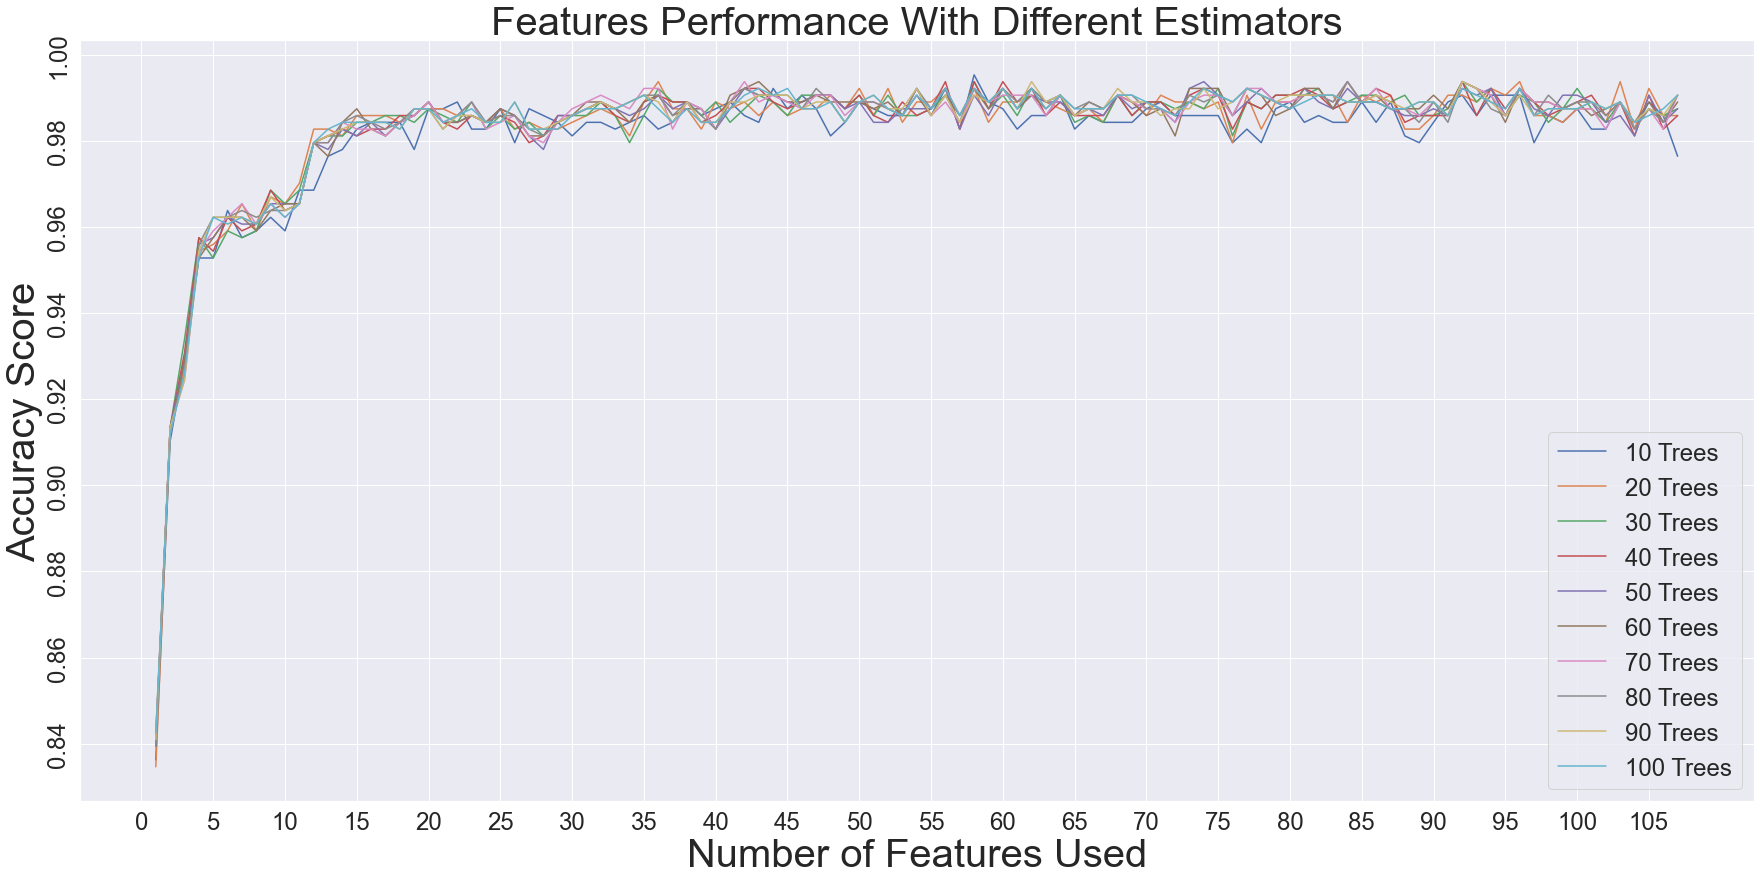

In [73]:
f, ax = plt.subplots(figsize=(30, 14))
filename = os.path.join(output_dir, 'features_performance_with_estimators.tiff')
filename_jpg = os.path.join(output_dir, 'features_performance_with_estimators.jpg')

ax = sns.lineplot(
    data = result_with_estimators_df, 
    x = "number_of_features", 
    y = "accuracy_score",
    hue = "estimators",
)

plt.setp(ax.get_yticklabels(), va="center")

ax.set_xticks(range(0,108,5))
ax.set_title('Features Performance With Different Estimators', fontsize=40)
ax.set_xlabel('Number of Features Used', fontsize=40)
ax.set_ylabel('Accuracy Score', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='y', which='major', labelrotation = 90)

plt.legend(fontsize=24)
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.savefig(filename_jpg, dpi=300, bbox_inches='tight')
plt.show()

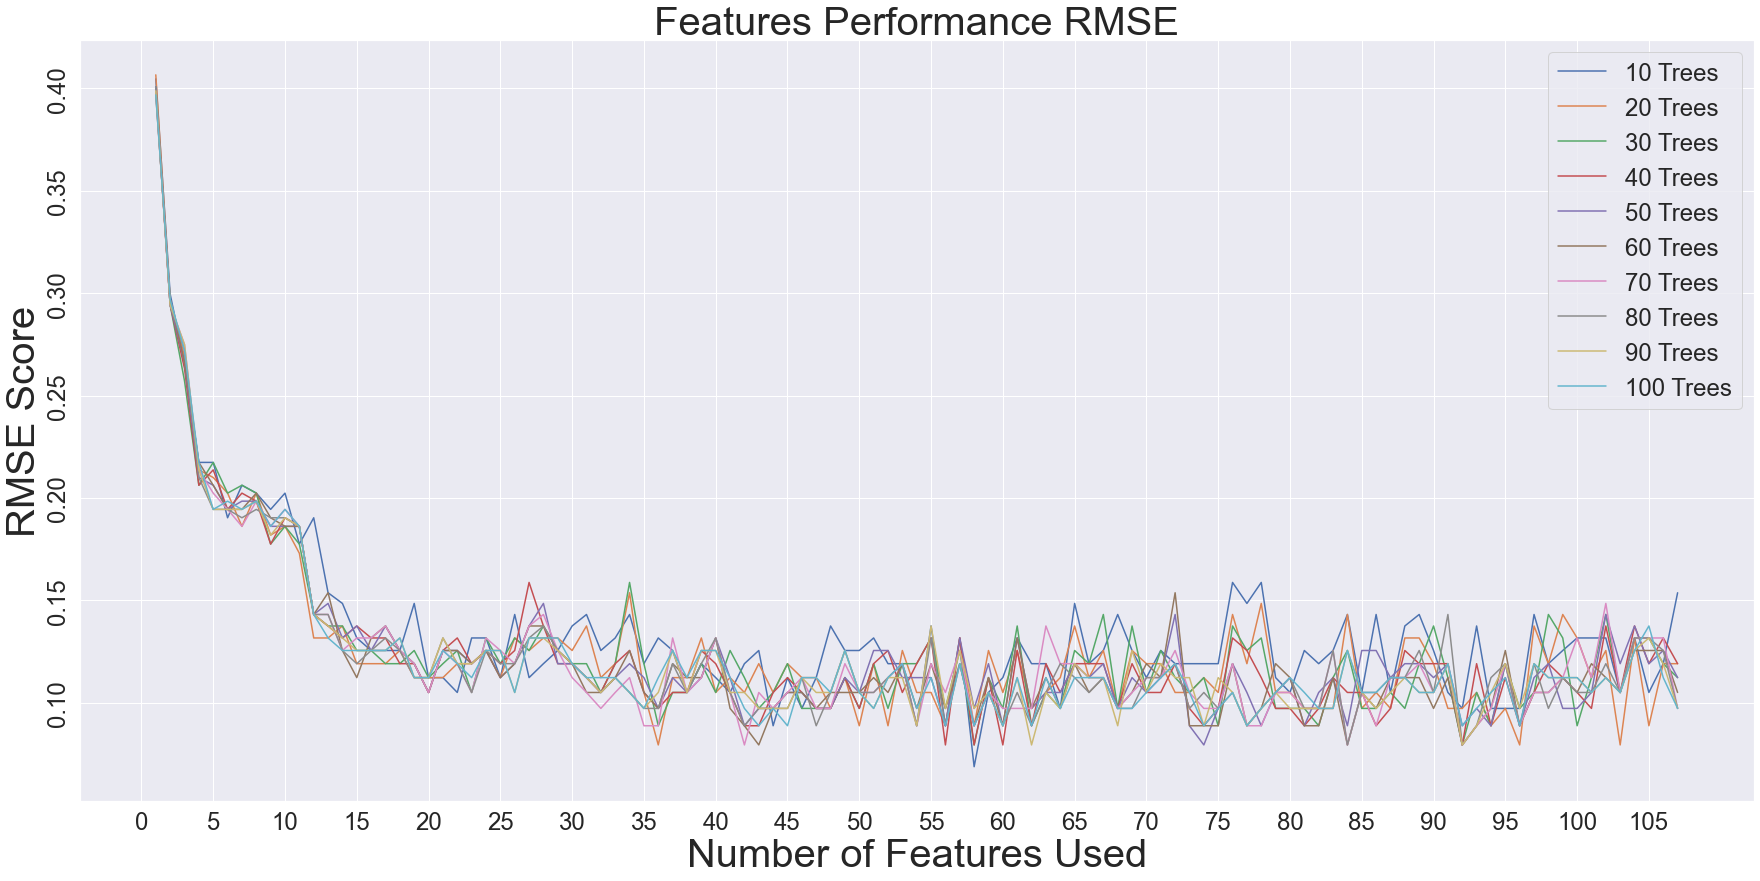

In [76]:
f, ax = plt.subplots(figsize=(30, 14))
filename = os.path.join(output_dir, 'features_performance_with_estimators_and_rmse.tiff')
filename_jpg = os.path.join(output_dir, 'features_performance_with_estimators_and_rmse.jpg')

ax = sns.lineplot(
    data = result_with_estimators_df, 
    x = "number_of_features", 
    y = "rmse",
    hue = "estimators",
)

plt.setp(ax.get_yticklabels(), va="center")

ax.set_xticks(range(0,108,5))
ax.set_title('Features Performance RMSE', fontsize=40)
ax.set_ylabel('RMSE Score', fontsize=40)
ax.set_xlabel('Number of Features Used', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='y', which='major', labelrotation = 90)

plt.legend(fontsize=24)
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.savefig(filename_jpg, dpi=300, bbox_inches='tight')
plt.show()

---

# Plotting Nilai hasil Prediksi dengan nilai rata-rata estimator yang digunakan

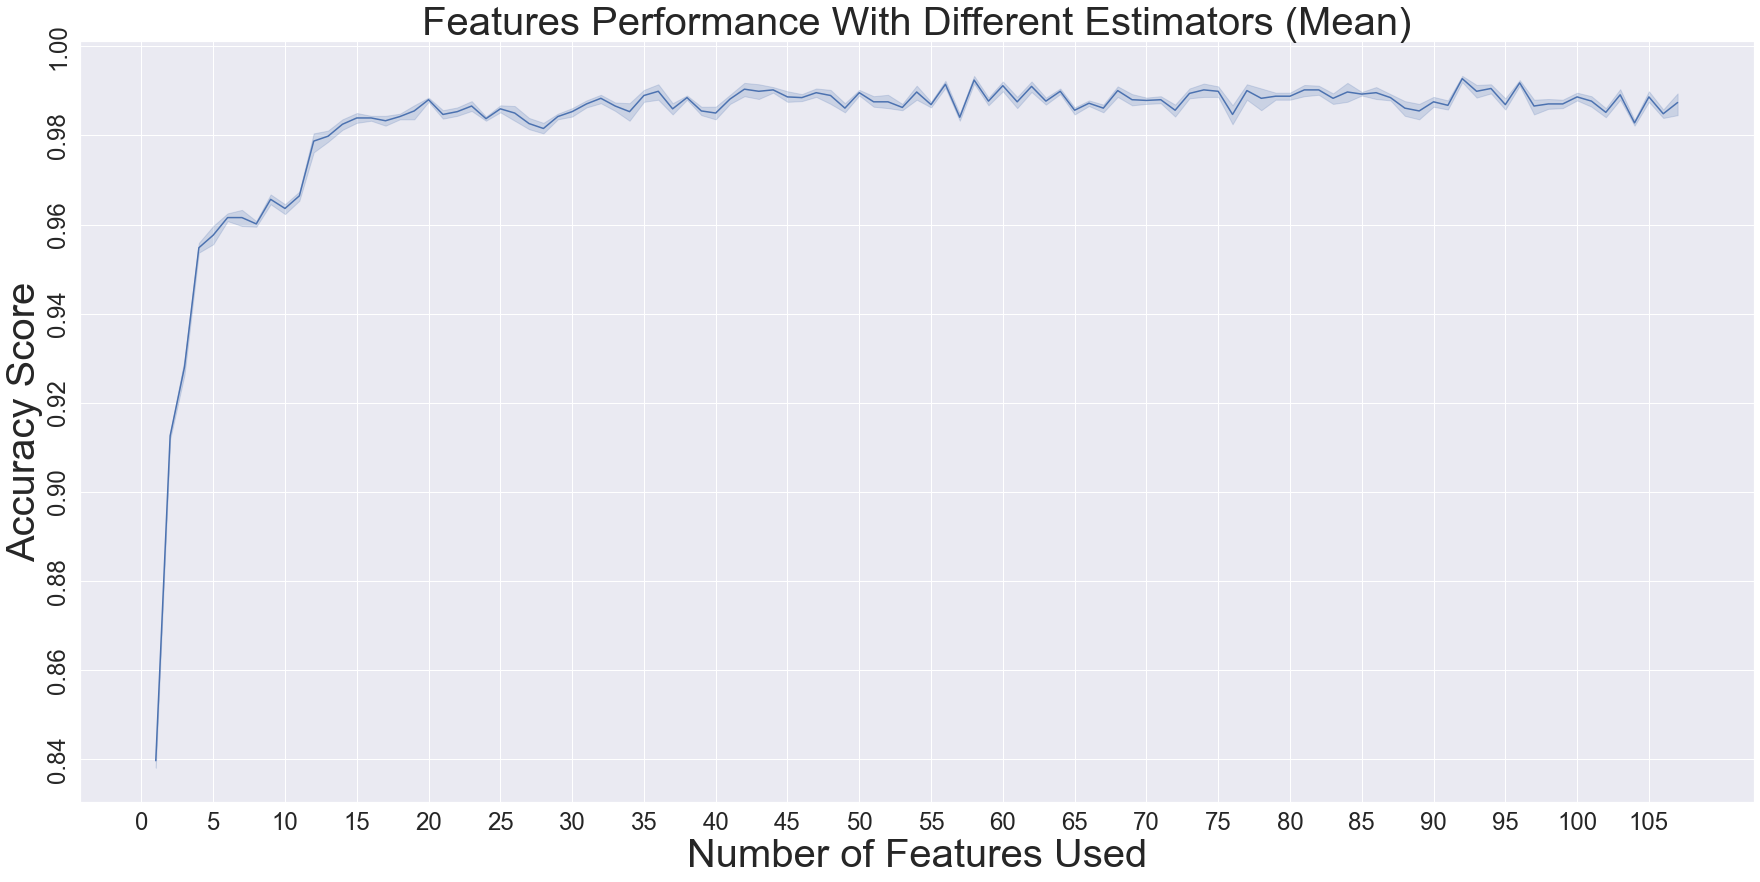

In [77]:
f, ax = plt.subplots(figsize=(30, 14))
filename = os.path.join(output_dir, 'features_performance_with_estimators_mean.tiff')
filename_jpg = os.path.join(output_dir, 'features_performance_with_estimators_mean.jpg')

ax = sns.lineplot(
    data = result_with_estimators_df, 
    x = "number_of_features", 
    y = "accuracy_score",
)

plt.setp(ax.get_yticklabels(), va="center")

ax.set_xticks(range(0,108,5))
ax.set_title('Features Performance With Different Estimators (Mean)', fontsize=40)
ax.set_xlabel('Number of Features Used', fontsize=40)
ax.set_ylabel('Accuracy Score', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='y', which='major', labelrotation = 90)

plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.savefig(filename_jpg, dpi=300, bbox_inches='tight')
plt.show()

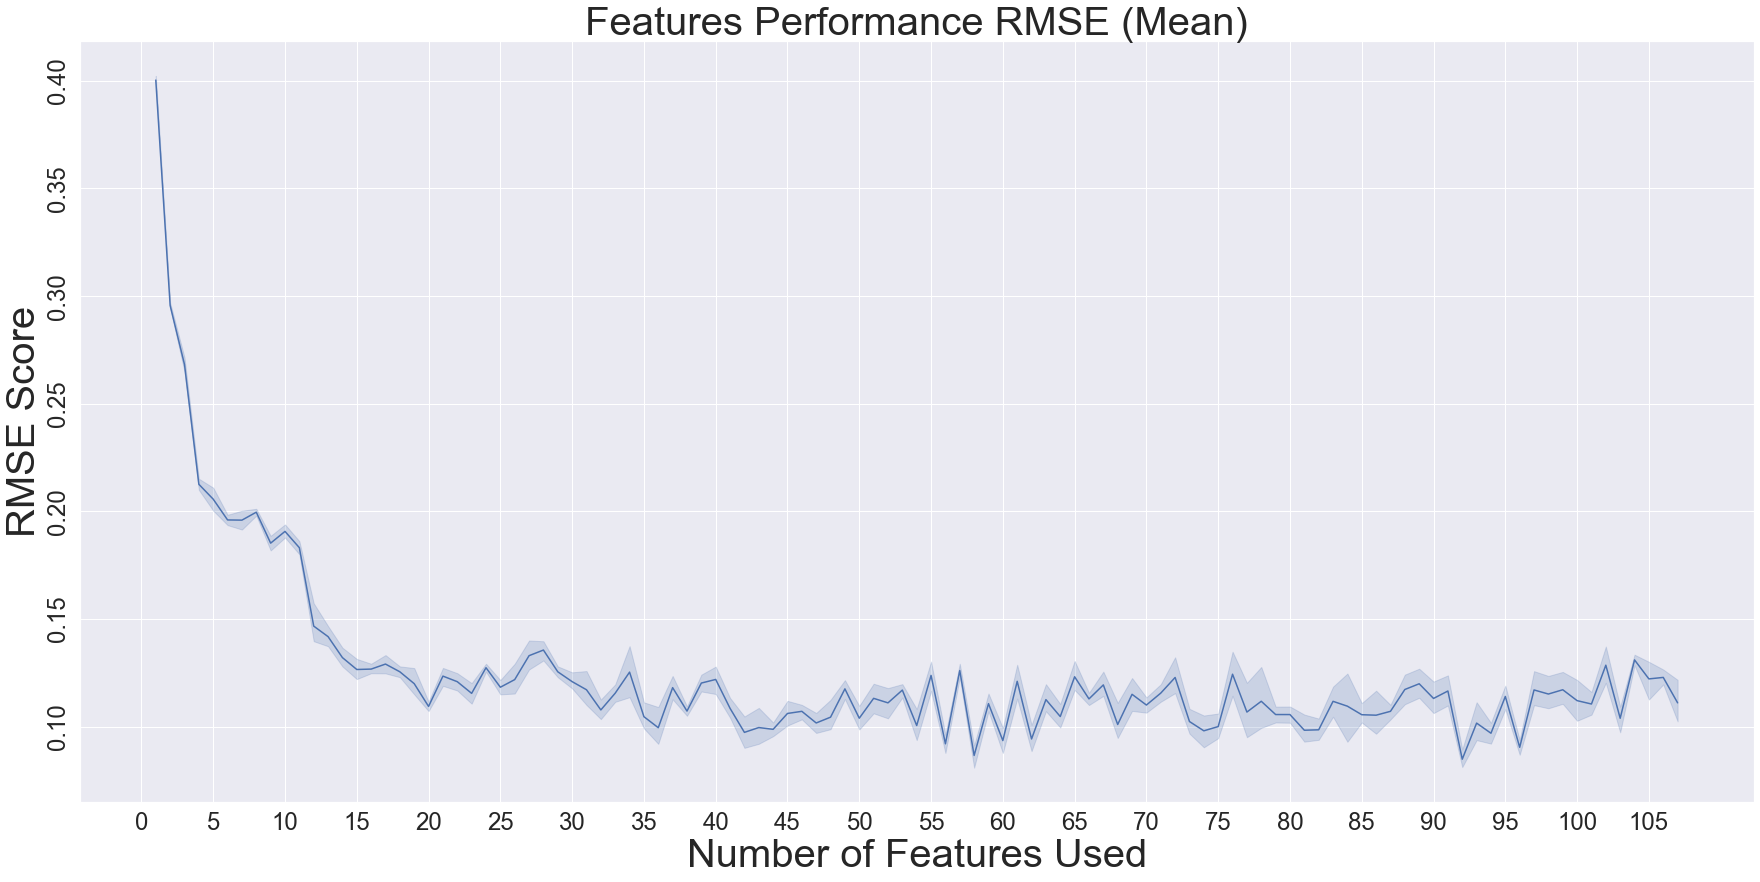

In [79]:
f, ax = plt.subplots(figsize=(30, 14))
filename = os.path.join(output_dir, 'features_performance_with_estimators_error_rmse_mean.tiff')
filename_jpg = os.path.join(output_dir, 'features_performance_with_estimators_error_rmse_mean.jpg')

ax = sns.lineplot(
    data = result_with_estimators_df, 
    x = "number_of_features", 
    y = "rmse",
)

plt.setp(ax.get_yticklabels(), va="center")

ax.set_xticks(range(0,108,5))
ax.set_title('Features Performance RMSE (Mean)', fontsize=40)
ax.set_xlabel('Number of Features Used', fontsize=40)
ax.set_ylabel('RMSE Score', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='y', which='major', labelrotation = 90)

plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.savefig(filename_jpg, dpi=300, bbox_inches='tight')
plt.show()